In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [46]:
def interp_funcs(t,N,Phi):
    """
    Auxiliary function. This interpolates then adds the first
    N Eigenfunctions of the Nystrom approximation.
    -----
    input
    -----
    N: Order of the Karhunen-Loeve expansion.
    Phi: Matrix whose columns contain eigenvectors as grid function.
    Z: 1-D array of standard normal simulations.
    t: domain of grid points to interpolate on. 
    -----
    output
    -----
    f: A function which will the sum of the interpolates of eigenfunctions.
    """
    return [interpolate.interp1d(t,Phi[:,k]) for k in range(N)]
        
def KL_1DNys(N,M,a,b,Cov,quad = "EOLE"):
    """
    Karhunen-Loeve in 1-Dimension using Nystrom method.
    -----
    input
    -----
    N: Order of the Karhunen-Loeve expansion.
    M: number of quadrature points . N <=M
    a,b: domain of simulation, X_t for t in [a,b]
    Cov: The covariance function, a bivariate function
    quad: Quadrature used."EOLE" for the EOLE method. I tried Gauss-Legendre
    before and there was an issue with inaccurate simulation at the end
    points of the simulation domain
    -----
    output
    -----
    X: a 1-D array of the random field
    phi: a 2-D arrray whose columns are the eigenfunctions
    L: an 1-D array of the eigenvalues.
    """
    if not isinstance(N,int) or N <= 0:
        raise TypeError("The order of the Karhunen-Loeve expansion should be a positive integer.")
    if not isinstance(M,int) or M <= 1:
        raise TypeError(" The number of quadrature points should be a positive integer two or more.")
    if a >= b:
        raise ValueError("Domain needs to have a positive length, a < b.")
    if not isinstance(a, (int,float,complex)) or not isinstance(b, (int,float,complex)):
        raise TypeError("a and b should be real numbers.")
    if N > M:
        raise ValueError('Order of expansion N should be less than quadrature\
points used')
    if quad == "EOLE":
        x = np.linspace(a,b,M) # quadrature points grid. 
        x1,x2 = np.meshgrid(x,x) # mesh grid for the covariance function.
        C = Cov(x1,x2) # returns the covariance matrix.
        W = ((M-1)/(b-a))*np.eye(M) # The weights matrix.
        B = np.dot(np.dot(np.sqrt(W),C),np.sqrt(W)) #symmetric B matrix.
        L,Y = np.linalg.eig(B) # return eigenvalues and eigenvectors of B.
        W_inv = np.sqrt((b-a)/(M-1))*np.eye(M) # inverse square root of W
        phi = np.dot(W_inv,Y) # Eigenvectors of the original problem.
        Z = np.random.randn(N) # iid standard normals
        phis = interp_funcs(x,N,phi) # list of interpolated eigenvectors
        def KL_sum(t):
            return sum(phis[k](t)*Z[k]*np.sqrt(L[k]) for k in range(N))
        return KL_sum
            
    

In [47]:
N = 100 # order of the KL expansion
M = 200 # M+1 quadrature points
def Bm(t,s):
    return np.minimum(t,s)
a, b = 0., 1. # domain of simulation
X = KL_1DNys(N,M,a,b,Bm)

NameError: name 't' is not defined

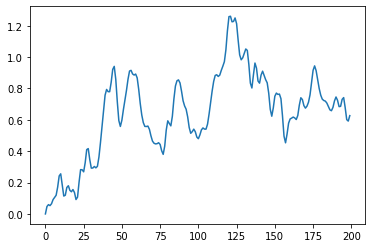

In [45]:
x= np.linspace(a,b,M)
X(x)
plt.plot(X(x))